In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

%matplotlib inline

In [2]:
train = pd.read_csv("train-data.csv")
test = pd.read_csv("test-data.csv")

In [3]:
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [5]:
print(f"Shape of the dataset is {train.shape}")

Shape of the dataset is (6019, 14)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [7]:
# removing the first column, as it is just the index

train = train.iloc[:, 1:]
test = test.iloc[:, 1:]

In [8]:
# the name of the model is not that important but the company name is important 

train['Manufacturer'] = train['Name'].str.split(' ', expand=True)[0]
test['Manufacturer'] = test['Name'].str.split(' ', expand=True)[0]

In [9]:
# Here we have dropped the Name feature as it is no longer required

train.drop(['Name'], inplace=True, axis=1)
test.drop(['Name'], inplace=True, axis=1)

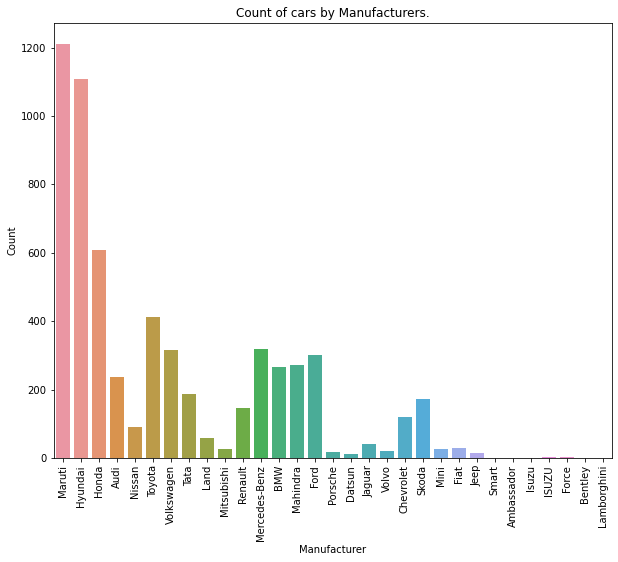

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x='Manufacturer', data=train)
plt.xticks(rotation=90)
plt.title("Count of cars by Manufacturers.")
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show();

In [11]:
# Now we will create an Age feature and use it instead of Year

current_year = datetime.datetime.now().year

train['Age'] = current_year - train['Year']
test['Age'] = current_year - test['Year']

In [12]:
# Removing Year feature.

train.drop(['Year'], axis=1, inplace=True)
test.drop(['Year'], axis=1, inplace=True)

In [13]:
train.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Manufacturer,Age
0,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,10
1,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,5
2,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,9
3,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,8
4,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,7


#### Let's check all the null values

In [14]:
print('Null values in Training data set: ')
train.isnull().sum()

Null values in Training data set: 


Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
Manufacturer            0
Age                     0
dtype: int64

In [15]:
print('Null values in Test data set: ')
test.isnull().sum()

Null values in Test data set: 


Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
Manufacturer            0
Age                     0
dtype: int64

##### Now we will handle Null values in Training and Test set

In [16]:
# Removing Null values from Mileage Column.
train = train.dropna(axis=0, subset=['Mileage'])

In [17]:
train.shape

(6017, 13)

#### Seats feature:

In [18]:
# Now we will handle Seats value:
seats_median_train = train['Seats'].median()

# We will replace the Null values in Seats feature with median value:
train['Seats'] = train['Seats'].fillna(seats_median_train)
print("Null values in Seats in Training data: {}".format(train['Seats'].isnull().sum()))
# As we see we have replaced nan values with median

seats_median_test = test['Seats'].median()

test['Seats'] = test['Seats'].fillna(seats_median_test)
print("Null values in Seats in Test data: {}".format(test['Seats'].isnull().sum()))

Null values in Seats in Training data: 0
Null values in Seats in Test data: 0


#### Engine Feature:

In [19]:
# We will use the most common Engine size and replace null values with it

most_freq_engine_train = train['Engine'].value_counts().index[0]

print(f"The most common Engine size in Training set is {most_freq_engine_train}")

# We will replace null values with 1197 CC
train['Engine'] = train['Engine'].fillna(most_freq_engine_train)

The most common Engine size in Training set is 1197 CC


In [20]:
# Similarly we will impute NaN values in Test set:

most_freq_engine_test = test['Engine'].value_counts().index[0]

print(f"The most common Engine size in Test set is {most_freq_engine_test}")

# replacing null values
test["Engine"] = test['Engine'].fillna(most_freq_engine_test)

The most common Engine size in Test set is 1197 CC


#### Power Feature:

In [21]:
# Here also will use the most common Power feature and replace null values with it 

most_freq_power_train = train['Power'].value_counts().index[0]
most_freq_power_test = test['Power'].value_counts().index[0]

print(f"The most common Power in Training Set is {most_freq_power_train}")
print(f"The most common Power in Test Set is {most_freq_power_test}")

The most common Power in Training Set is 74 bhp
The most common Power in Test Set is 74 bhp


In [22]:
# Replacing the null values in both training and test

train['Power'] = train['Power'].fillna(most_freq_power_train)
test['Power'] = test['Power'].fillna(most_freq_power_test)

In [23]:
# There are some 'null bhp' values in Power, we will handle that too

train['Power'] = np.where(train['Power']=='null bhp', most_freq_power_train, train['Power'])
test['Power'] = np.where(test['Power']=='null bhp', most_freq_power_test, test['Power'])

### Now we have handled all the Null Values.

#### We will drop the 'New Price' column because there are a lot of missing values

In [24]:
train.drop(['New_Price'], inplace=True, axis=1)
test.drop(['New_Price'], inplace=True, axis=1)

In [25]:
train.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Age
0,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,10
1,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,5
2,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,9
3,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,8
4,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,7


In [26]:
test.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer,Age
0,Delhi,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,Maruti,6
1,Coimbatore,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,Maruti,7
2,Mumbai,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,Toyota,3
3,Hyderabad,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,74 bhp,5.0,Toyota,8
4,Mumbai,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,Hyundai,6


## Feature Engineering:

In [27]:
train.shape

(6017, 12)

In [28]:
# In Engine we have CC, we have to remove it and convert it to numeric

engine_train = train['Engine'].str.split(' ', expand=True)
engine_test = test['Engine'].str.split(' ', expand=True)

In [29]:
train['Engine'] = pd.to_numeric(engine_train[0])
test['Engine'] = pd.to_numeric(engine_test[0])

In [30]:
# In Power we have bhp, we have to remove it and convert it to numeric

power_train = train['Power'].str.split(' ', expand=True)
power_test = test['Power'].str.split(' ', expand=True)

In [31]:
train['Power'] = pd.to_numeric(power_train[0])
test['Power'] = pd.to_numeric(power_test[0])

In [32]:
# In Mileage we have kmpl, we have to remove it and convert it to numeric

mileage_train = train['Mileage'].str.split(' ', expand=True)
mileage_test = test['Mileage'].str.split(' ', expand=True)

In [33]:
train['Mileage'] = pd.to_numeric(mileage_train[0])
test['Mileage'] = pd.to_numeric(mileage_test[0])

In [34]:
# Lets check our dataset till now

In [35]:
train.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Age
0,Mumbai,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Maruti,10
1,Pune,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,5
2,Chennai,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda,9
3,Chennai,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,8
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi,7


In [36]:
test.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer,Age
0,Delhi,40929,CNG,Manual,First,32.26,998,58.20,4.0,Maruti,6
1,Coimbatore,54493,Petrol,Manual,Second,24.70,796,47.30,5.0,Maruti,7
2,Mumbai,34000,Diesel,Manual,First,13.68,2393,147.80,7.0,Toyota,3
3,Hyderabad,139000,Diesel,Manual,First,23.59,1364,74.00,5.0,Toyota,8
4,Mumbai,29000,Petrol,Manual,First,18.50,1197,82.85,5.0,Hyundai,6


### Now lets do Data Visualization

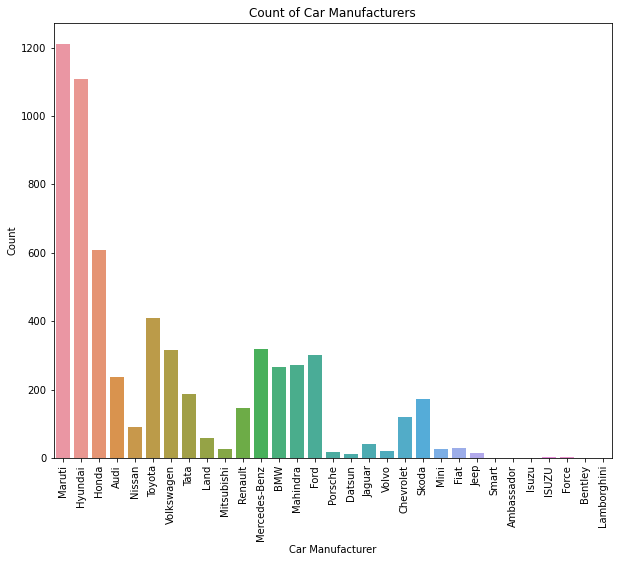

In [37]:
# Having a look at Car Manufacturers

plt.figure(figsize=(10,8))
sns.countplot(x='Manufacturer', data=train)
plt.xticks(rotation=90)
plt.title('Count of Car Manufacturers')
plt.xlabel('Car Manufacturer')
plt.ylabel('Count')
plt.show();

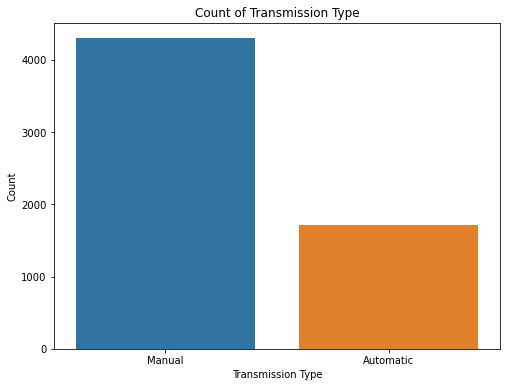

In [38]:
# We will take a look at Transmission count
plt.figure(figsize=(8,6))
sns.countplot(x='Transmission', data=train)
plt.title('Count of Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show();

We see that majority of the cars are having Manual Transmission

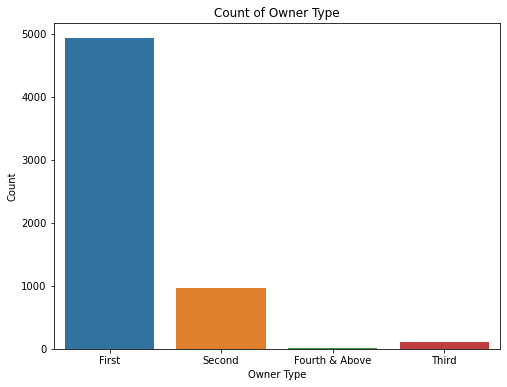

In [39]:
# Taking a look at Owners
plt.figure(figsize=(8,6))
sns.countplot(x='Owner_Type', data=train)
plt.title('Count of Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Count');

Here, we see that most of the cars are First Owner Cars followed by Second owner then third owner and there are only a few that are Fourth or above.

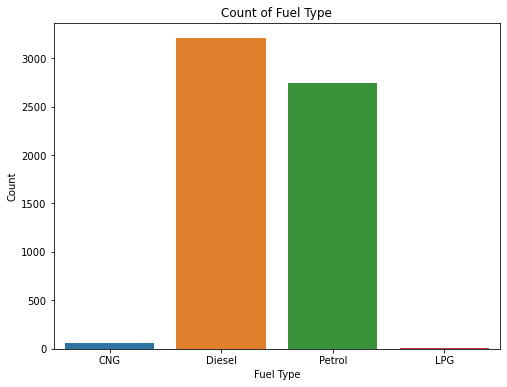

In [40]:
# Having a look at Fuel Type
plt.figure(figsize=(8,6))
sns.countplot(x='Fuel_Type', data=train)
plt.title('Count of Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count');

Majority of the cars are of fuel type Petrol or Diesel, there are only afew cars which are running at CNG or LPG.

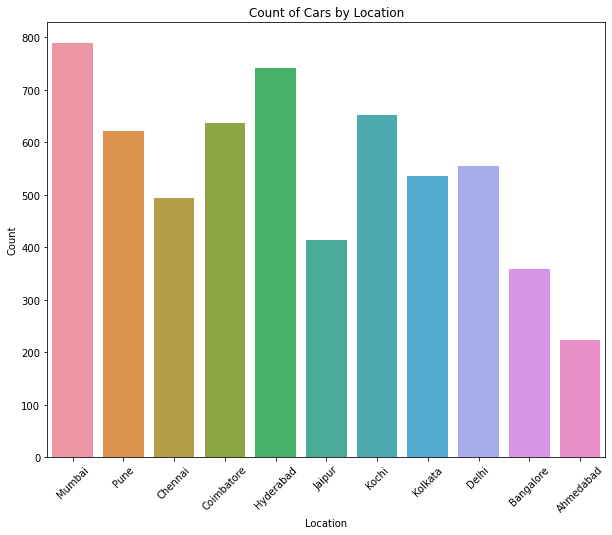

In [41]:
# Now lets take a look at location
plt.figure(figsize=(10,8))
sns.countplot(x='Location', data=train)
plt.xticks(rotation=45)
plt.title('Count of Cars by Location')
plt.xlabel('Location')
plt.ylabel('Count');

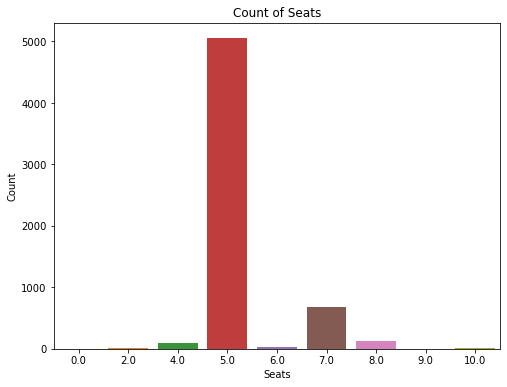

In [42]:
# Having a look at Seats
plt.figure(figsize=(8,6))
sns.countplot(x='Seats', data=train)
plt.title('Count of Seats')
plt.xlabel('Seats')
plt.ylabel('Count');

Majority of the cars are having 5 seats, therefore we can say that most of the cars are either sedans or hatchbacks.
Second most common seating arrangement is 7 or 8 seater cars which we can say belong to the SUV category.

<AxesSubplot:xlabel='Kilometers_Driven'>

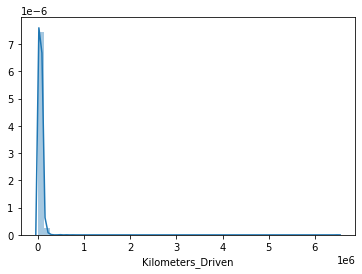

In [43]:
# Distribution of Kilometers Driven

plt.figure()
sns.distplot(train['Kilometers_Driven'])

<AxesSubplot:xlabel='Engine'>

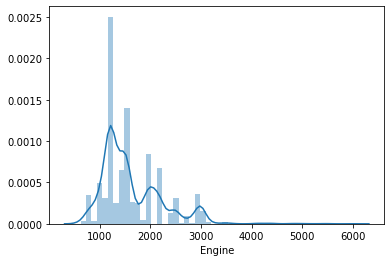

In [44]:
# Distribution of Engine size
plt.figure()
sns.distplot(train['Engine'])

<AxesSubplot:xlabel='Power'>

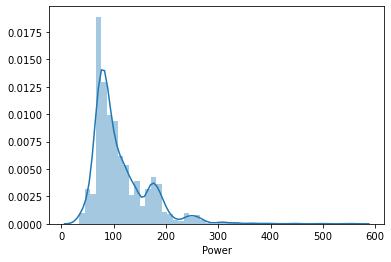

In [45]:
# Distribution of Power 
plt.figure()
sns.distplot(train['Power'])

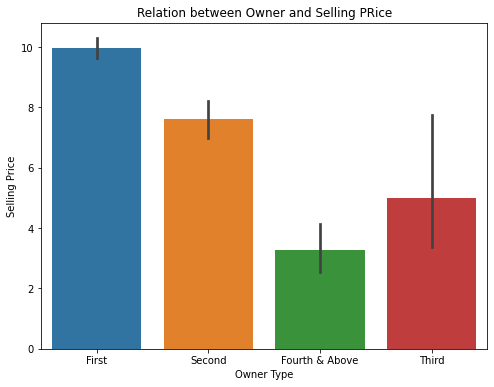

In [46]:
# Looking at relation between Owner and Selling Price

plt.figure(figsize=(8,6))
sns.barplot(x='Owner_Type', y='Price', data=train)
plt.title('Relation between Owner and Selling PRice')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price');

Here we can see that the first owner cars generally sell at a higher price as compared to others followed by Second owner and then Third owner and the last Fourth & above.

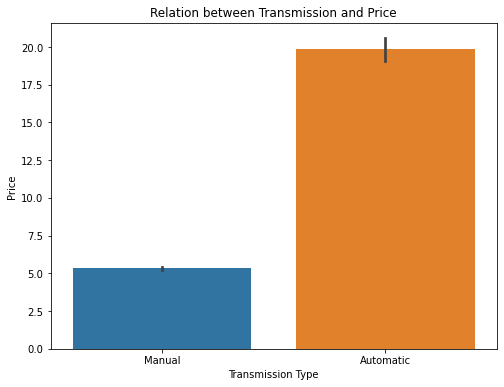

In [47]:
# Relation between Transmission and Price

plt.figure(figsize=(8,6))
sns.barplot(x='Transmission', y='Price', data=train)
plt.title('Relation between Transmission and Price')
plt.xlabel('Transmission Type')
plt.ylabel('Price');

From the graph above we can conclude that the Automatic Transmission cars have a much higher selling price than the Manual Transmission cars

<Figure size 432x288 with 0 Axes>

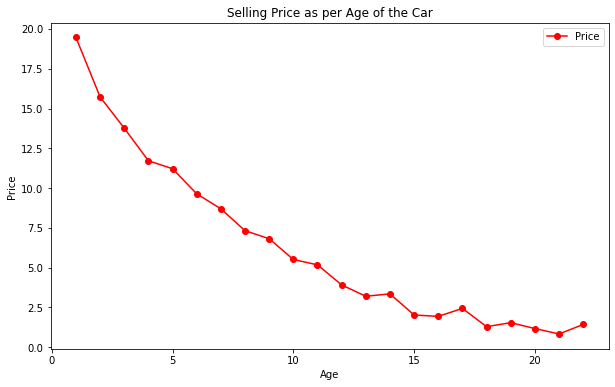

In [48]:
# Looking at the Price with Age
plt.figure()
train.groupby('Age')[['Price']].mean().plot(figsize=(10,6), marker='o', color='red')
plt.title('Selling Price as per Age of the Car')
plt.ylabel('Price');

As expected, we see that as the Age of the Car becomes higher the Selling Price becomes lower.

<Figure size 432x288 with 0 Axes>

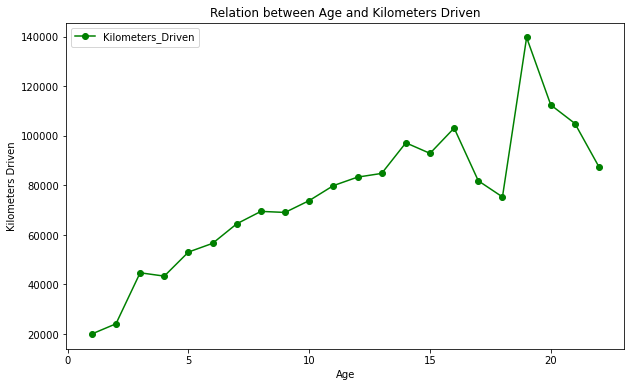

In [49]:
# Looking at Kilometers Driven and Age

plt.figure()
train.groupby('Age')[['Kilometers_Driven']].mean().plot(figsize=(10,6), marker='o', color='green')
plt.title('Relation between Age and Kilometers Driven')
plt.ylabel('Kilometers Driven');

Here we see the trend that as the Age increases the Kilometers Driven also increases, which is expected trend.

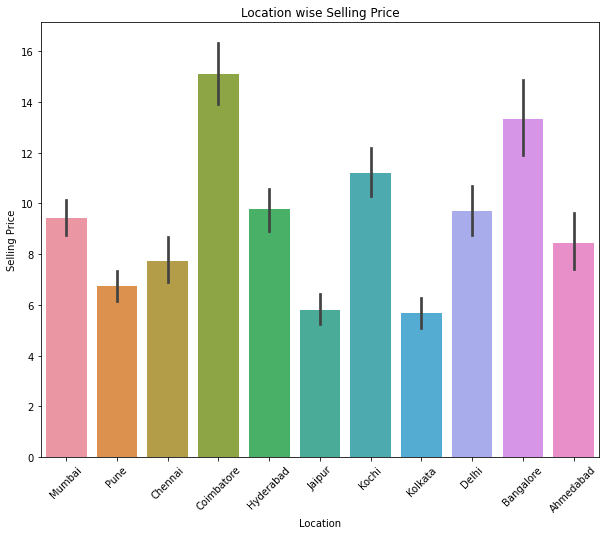

In [50]:
# Now we will check if Location plays a role in selling price 

plt.figure(figsize=(10,8))
sns.barplot(x='Location', y='Price', data=train)
plt.title('Location wise Selling Price')
plt.xlabel('Location')
plt.ylabel('Selling Price')
plt.xticks(rotation=45);

In [51]:
# We dont need location as it won;t play much important role

train.drop(['Location'], axis=1, inplace=True)
test.drop(['Location'], axis=1, inplace=True)

In [52]:
train.head()

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Age
0,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Maruti,10
1,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,5
2,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda,9
3,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,8
4,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi,7


<Figure size 432x288 with 0 Axes>

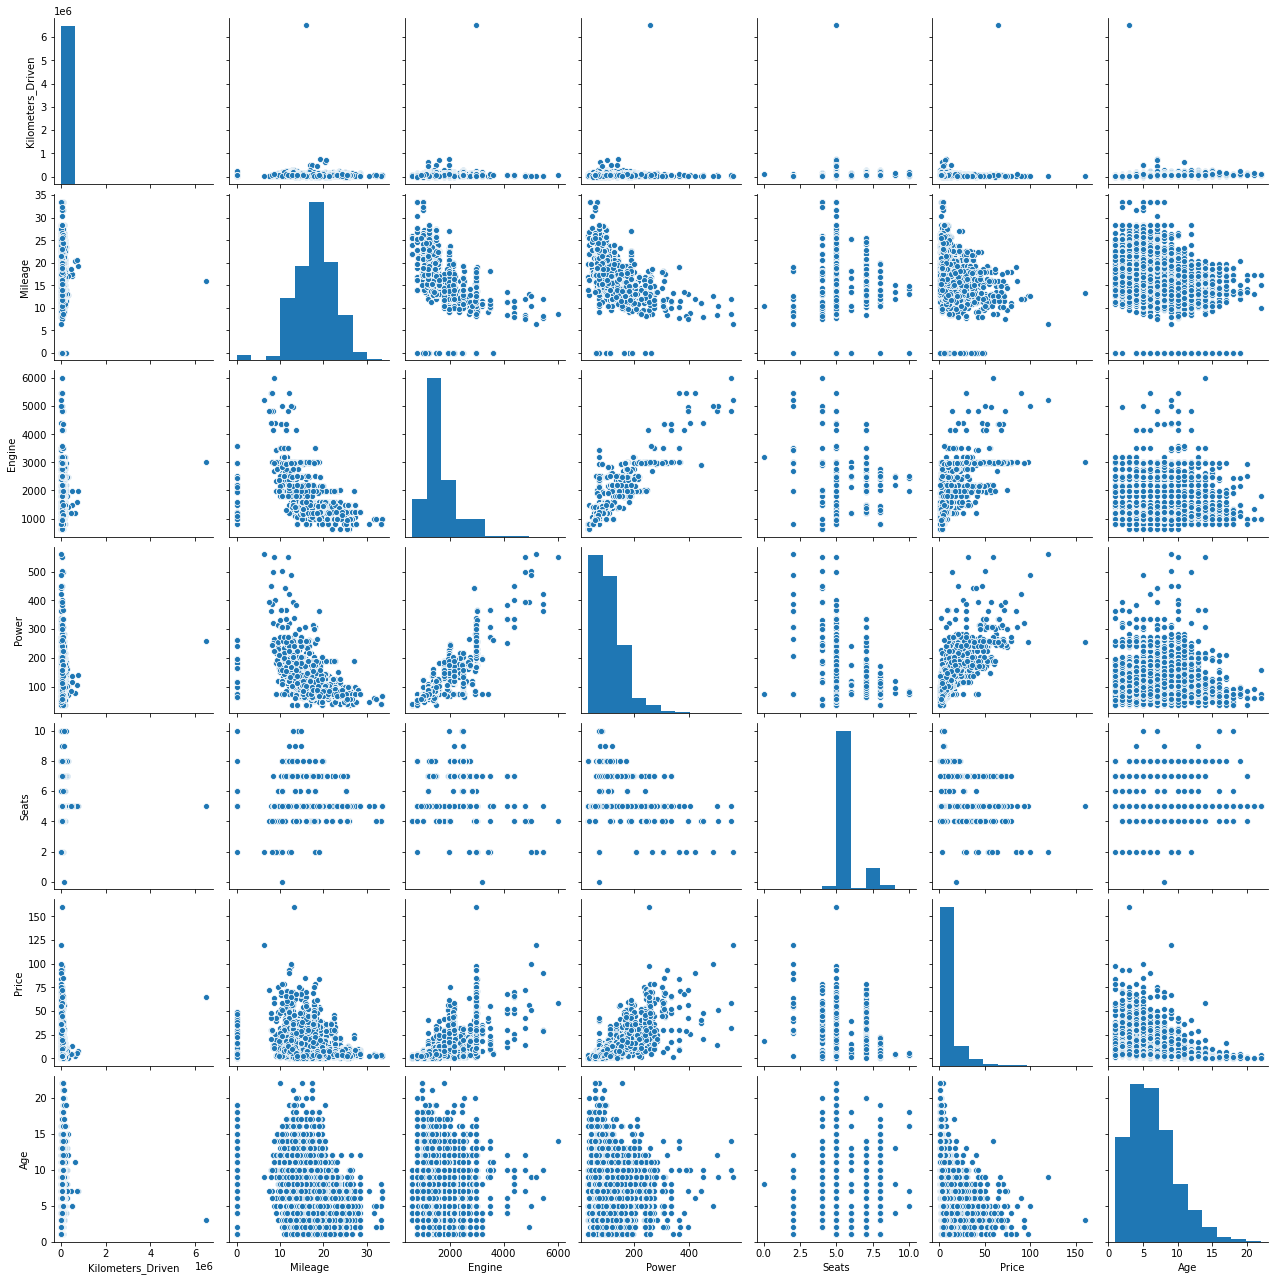

In [53]:
plt.figure()
sns.pairplot(train)
plt.show();

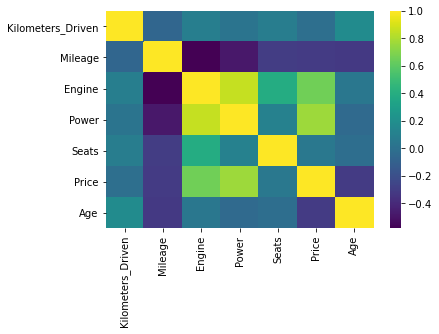

In [54]:
# Correlation heatmap
plt.figure()
sns.heatmap(train.corr(), cmap='viridis')
plt.show()

### Handling categorical features

In [55]:
# Lets check the categorical features

categorical_features = []
for feature in list(train.columns):
    if train[feature].dtype == 'O':
        categorical_features.append(feature)

In [56]:
categorical_features

['Fuel_Type', 'Transmission', 'Owner_Type', 'Manufacturer']

In [57]:
# Lets first look at Fuel_Type

fuel_df_train = pd.get_dummies(train[['Fuel_Type']], drop_first=True)
fuel_df_test = pd.get_dummies(test[['Fuel_Type']], drop_first=True)

In [58]:
train = pd.concat([train, fuel_df_train], axis=1)
test = pd.concat([test, fuel_df_test], axis=1)

In [59]:
# We no longer need Fuel_Type
train.drop(['Fuel_Type'], axis=1, inplace=True)
test.drop(['Fuel_Type'], axis=1, inplace=True)

In [60]:
train.head()

,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Age,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,72000,Manual,First,26.60,998,58.16,5.0,1.75,Maruti,10,0,0,0
1,41000,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,5,1,0,0
2,46000,Manual,First,18.20,1199,88.70,5.0,4.50,Honda,9,0,0,1
3,87000,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,8,1,0,0
4,40670,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi,7,1,0,0


In [61]:
test.head()

,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer,Age,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,40929,Manual,First,32.26,998,58.20,4.0,Maruti,6,0,0,0
1,54493,Manual,Second,24.70,796,47.30,5.0,Maruti,7,0,0,1
2,34000,Manual,First,13.68,2393,147.80,7.0,Toyota,3,1,0,0
3,139000,Manual,First,23.59,1364,74.00,5.0,Toyota,8,1,0,0
4,29000,Manual,First,18.50,1197,82.85,5.0,Hyundai,6,0,0,1


In [62]:
# Now we will look at the transmission

train.Transmission.value_counts()

Manual       4299
Automatic    1718
Name: Transmission, dtype: int64

In [63]:
# Encoding transmission

trans_train = pd.get_dummies(train[['Transmission']], drop_first=True)
trans_test = pd.get_dummies(test[['Transmission']], drop_first=True)

In [64]:
# Joining the datasets

train = pd.concat([train, trans_train], axis=1)
test = pd.concat([test, trans_test], axis=1)

In [65]:
# dropping transmission feature as we no longer need it 

train.drop(['Transmission'], axis=1, inplace=True)
test.drop(['Transmission'], axis=1, inplace=True)

In [66]:
# Now lets look at owner:

train.Owner_Type.value_counts()

First             4927
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [67]:
# Encoding Owner_Type

owner_train = pd.get_dummies(train[['Owner_Type']], drop_first=True)
owner_test = pd.get_dummies(test[['Owner_Type']], drop_first=True)

In [68]:
# Joining the datasets

train = pd.concat([train, owner_train], axis=1)
test = pd.concat([test, owner_test], axis=1)

In [69]:
# Dropping owner_type from dataset

train.drop(['Owner_Type'], axis=1, inplace=True)
test.drop(['Owner_Type'], axis=1, inplace=True)

In [70]:
train.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Manufacturer,Age,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000,26.60,998,58.16,5.0,1.75,Maruti,10,0,0,0,1,0,0,0
1,41000,19.67,1582,126.20,5.0,12.50,Hyundai,5,1,0,0,1,0,0,0
2,46000,18.20,1199,88.70,5.0,4.50,Honda,9,0,0,1,1,0,0,0
3,87000,20.77,1248,88.76,7.0,6.00,Maruti,8,1,0,0,1,0,0,0
4,40670,15.20,1968,140.80,5.0,17.74,Audi,7,1,0,0,0,0,1,0


<Figure size 432x288 with 0 Axes>

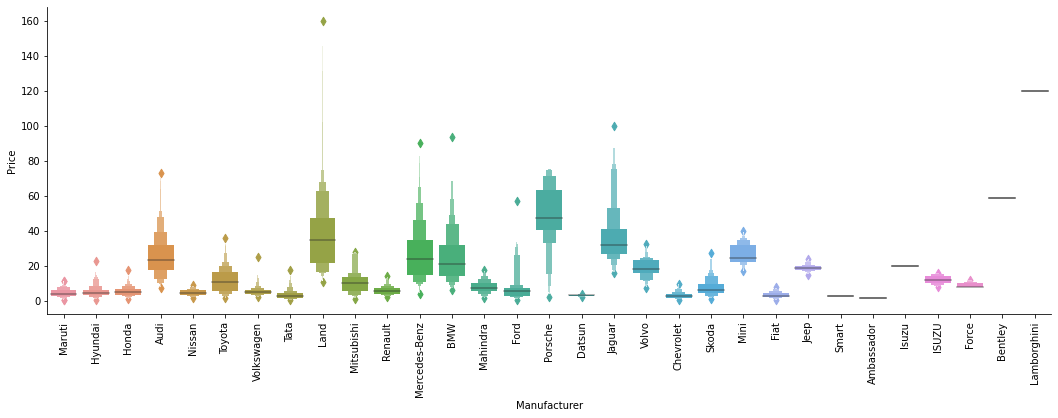

In [71]:
# Now lets look at Manufacturers

plt.figure()
sns.catplot(x='Manufacturer', y='Price', data=train, kind='boxen', aspect=3)
plt.xticks(rotation=90)
plt.show();

As we can see there is a lot of variation in this data, therefore we will drop it.

In [72]:
# dropping manufacturer

train.drop(['Manufacturer'], axis=1, inplace=True)
test.drop(['Manufacturer'], axis=1, inplace=True)

### Lets look at our final dataset

In [73]:
train.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Age,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000,26.60,998,58.16,5.0,1.75,10,0,0,0,1,0,0,0
1,41000,19.67,1582,126.20,5.0,12.50,5,1,0,0,1,0,0,0
2,46000,18.20,1199,88.70,5.0,4.50,9,0,0,1,1,0,0,0
3,87000,20.77,1248,88.76,7.0,6.00,8,1,0,0,1,0,0,0
4,40670,15.20,1968,140.80,5.0,17.74,7,1,0,0,0,0,1,0


In [74]:
test.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Age,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,40929,32.26,998,58.20,4.0,6,0,0,0,1,0,0,0
1,54493,24.70,796,47.30,5.0,7,0,0,1,1,0,1,0
2,34000,13.68,2393,147.80,7.0,3,1,0,0,1,0,0,0
3,139000,23.59,1364,74.00,5.0,8,1,0,0,1,0,0,0
4,29000,18.50,1197,82.85,5.0,6,0,0,1,1,0,0,0


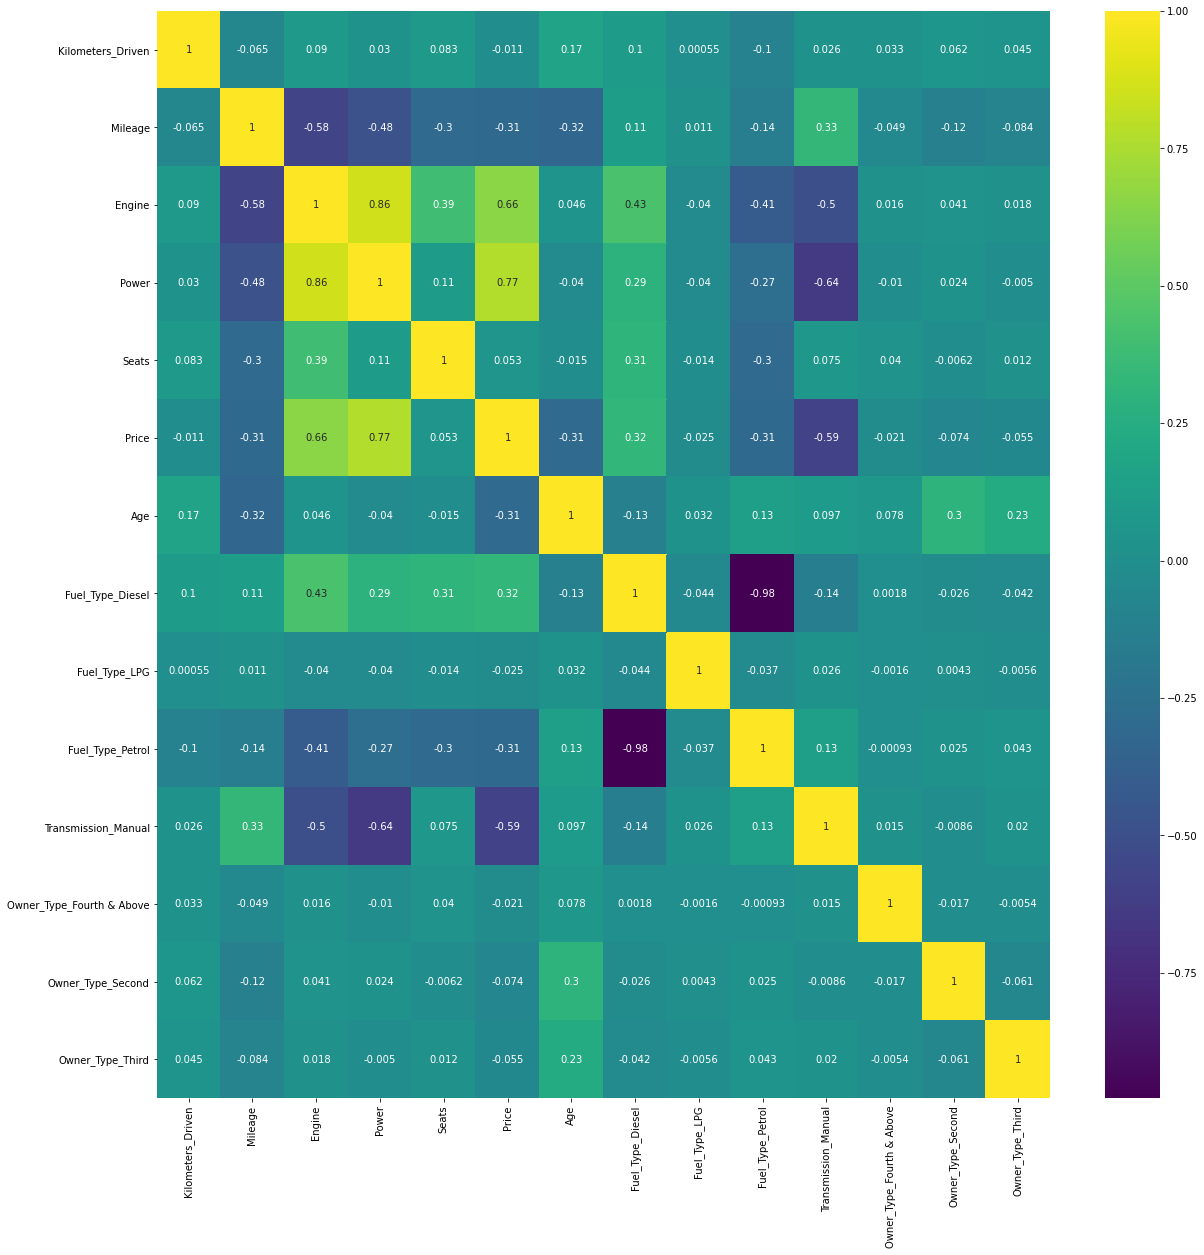

In [75]:
# Looking at the correlation of our final dataset

plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, cmap='viridis')
plt.show();

In [76]:
# Looking at the final features:

print(f"The final features of the datset is :\n{train.columns}")

The final features of the datset is :
Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price',
       'Age', 'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')


In [77]:
# Final Shape of the dataset:

print(f"Final shape of the dataset: {train.shape}")

Final shape of the dataset: (6017, 14)


##### Selecting independent and dependent features :

In [78]:
# selecting independent features:

X = train.loc[:, ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats','Age', 'Fuel_Type_Diesel',\
                 'Fuel_Type_LPG', 'Fuel_Type_Petrol','Transmission_Manual', 'Owner_Type_Fourth & Above',\
                 'Owner_Type_Second', 'Owner_Type_Third']]

In [79]:
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Age,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000,26.60,998,58.16,5.0,10,0,0,0,1,0,0,0
1,41000,19.67,1582,126.20,5.0,5,1,0,0,1,0,0,0
2,46000,18.20,1199,88.70,5.0,9,0,0,1,1,0,0,0
3,87000,20.77,1248,88.76,7.0,8,1,0,0,1,0,0,0
4,40670,15.20,1968,140.80,5.0,7,1,0,0,0,0,1,0


In [80]:
# Selecting dependent feature

y = train.loc[:, ['Price']]

y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


##### Having a look at the feature importance:

In [81]:
from sklearn.ensemble import ExtraTreesRegressor

etregressor = ExtraTreesRegressor()

In [82]:
etregressor.fit(X, y)

C:\Users\AMAN OSSAN\.conda\envs\carpredictions\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesRegressor()

In [83]:
feature_importance = pd.Series(data=etregressor.feature_importances_, index=X.columns)
feature_importance

Kilometers_Driven            0.037126
Mileage                      0.033589
Engine                       0.106469
Power                        0.252122
Seats                        0.035723
Age                          0.161354
Fuel_Type_Diesel             0.061593
Fuel_Type_LPG                0.000001
Fuel_Type_Petrol             0.003860
Transmission_Manual          0.301863
Owner_Type_Fourth & Above    0.000011
Owner_Type_Second            0.004524
Owner_Type_Third             0.001765
dtype: float64

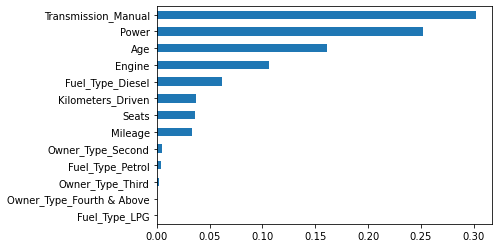

In [84]:
# Plotting the feature importances:

plt.figure()
feature_importance.sort_values().plot(kind='barh')
plt.show();

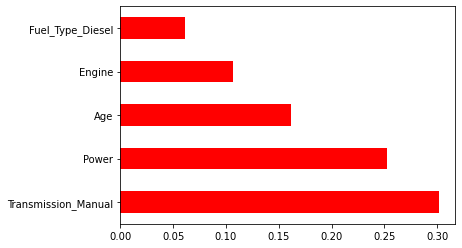

In [85]:
# Having a look at the top 5 features:

plt.figure()
feature_importance.nlargest(5).plot(kind='barh', color='red')
plt.show();

Here we see that the most important features include Transmission, Power, Age, Engine Size, and Fuel Type.

In [86]:
# Now we split the data to training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [87]:
# Having a look at the shape of the datasets
print(f"Training(X and y): {X_train.shape} and {y_train.shape}")
print(f"Test(X and y): {X_test.shape} and {y_test.shape}")

Training(X and y): (4813, 13) and (4813, 1)
Test(X and y): (1204, 13) and (1204, 1)


### Now lets start building our machine learning model

##### We will first try Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [90]:
# Predicting the values:

y_pred = linreg.predict(X_test)

In [91]:
# Our model's score:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Mean Squared Error: 41.35233974873633
R2 Score: 0.6873061795713076


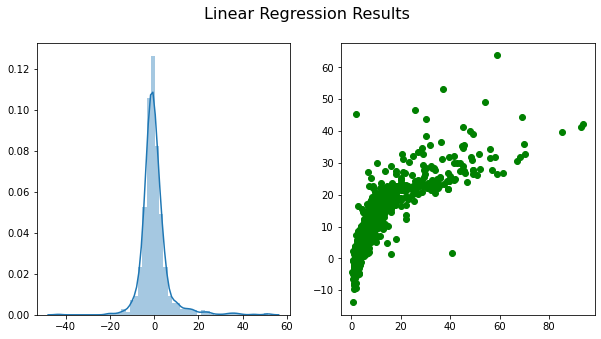

In [92]:
# Visualizing Linear Regression results

fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.distplot(y_test-y_pred, ax=ax[0])

ax[1].scatter(y_test, y_pred, color='green')

fig.suptitle('Linear Regression Results', fontsize=16);

#### Now we will try using Random Forest Regression and see if our score increase

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
# creating our model

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

C:\Users\AMAN OSSAN\.conda\envs\carpredictions\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor()

In [95]:
# predicting values

y_pred = rf.predict(X_test)

In [96]:
# Score of our model
print("Random Forest Regression: ")

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Random Forest Regression: 
Mean Squared Error: 18.184164900933204
R2 Score: 0.862496873726428


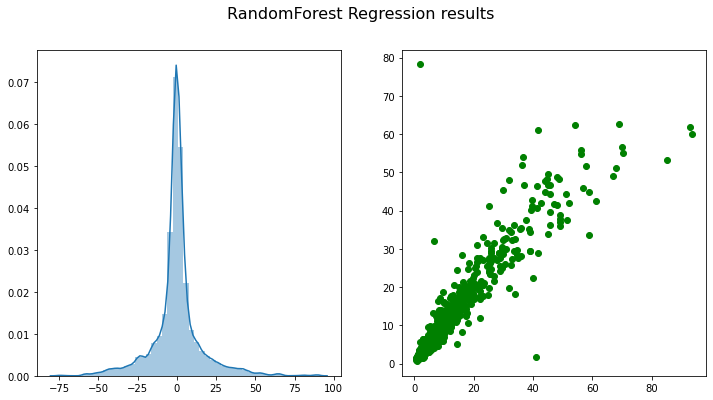

In [97]:
# visualizing Random Forest Regression results

fig, ax = plt.subplots(1, 2, figsize=(12,6))

sns.distplot(y_test.values-y_pred, ax=ax[0])

ax[1].scatter(y_test, y_pred, color='green')

fig.suptitle("RandomForest Regression results", fontsize=16);

As we can see here the results are much more better compared to linear regression. <br>
Also the r2_score is much better than linear regression

#### We have just applied RandomForestRegression without any hyperparameter tuning, now we will do so by using RandomizedSearchCV

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [126]:
# Parameter Grid:
params = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'criterion': ['mse', 'mae']
}

In [127]:
model = RandomForestRegressor()

rf_randomized = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=10,
                                   n_jobs=-1,
                                   verbose=2,
                                   cv=5)

In [128]:
rf_randomized.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 27.4min finished
C:\Users\AMAN OSSAN\.conda\envs\carpredictions\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [129]:
rf_randomized.best_estimator_

RandomForestRegressor(max_depth=60, max_features='sqrt', n_estimators=1800)

In [130]:
rf_randomized.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'criterion': 'mse',
 'bootstrap': True}

In [131]:
rf_model = RandomForestRegressor(n_estimators=1800,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                max_features='sqrt',
                                max_depth=60,
                                criterion='mse',
                                bootstrap=True)

In [132]:
rf_model.fit(X_train, y_train)

C:\Users\AMAN OSSAN\.conda\envs\carpredictions\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(max_depth=60, max_features='sqrt', n_estimators=1800)

In [133]:
y_pred = rf_model.predict(X_test)

In [134]:
print("After Hyperparameter tuning: \n")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

After Hyperparameter tuning: 

Mean Absolute Error: 1.6800563801947248
Mean Squared Error: 16.6763447800985
R2 Score: 0.8738985510430656


##### Saving our model:

In [135]:
import pickle

In [136]:
with open('used_car_predict_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [137]:
X_train.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Age',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [140]:
y1 = [[25000, 14.5, 1200, 120, 5, 6, 1, 0, 0, 1, 0, 0, 0]]

In [141]:
rf_model.predict(y1)

array([8.00182222])

In [142]:
y2 = [[25000, 14.5, 1200, 120, 5, 6, 0, 0, 1, 1, 0, 0, 0]]

In [143]:
rf_model.predict(y2)

array([7.30130556])